In [ ]:
!pip install python-Levenshtein

import json
import gensim
import Levenshtein # Import the Levenshtein module directly

# now you can use the imported libraries
# Example
# with open('file.json', 'r') as f:
#     data = json.load(f)
#     # ...process the data...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.6 MB/s eta 0:00:00


In [ ]:
# prompt: Read 'Sports_and_Outdoors_5.json'
import pandas as pd

df = pd.read_json('Sports_and_Outdoors_5.json', lines = True)
df.head()

ValueError: Unmatched ''"' when when decoding 'string'

In [ ]:
import pandas as pd

# Read the JSON file line by line and handle potential JSONDecodeErrors
def read_json_with_error_handling(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:  # Specify encoding for better handling of special characters
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line: {line.strip()} due to error: {e}")
    return pd.DataFrame(data)

# Now, read the file with error handling
df = read_json_with_error_handling('Sports_and_Outdoors_5.json')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"


In [ ]:
df.shape

(296337, 9)

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

# Convert the Series to a DataFrame to use justify
print(pd.DataFrame(df['reviewText'].head(10)).to_string(index=False, justify='right'))

                                                                                                                                                                                                                                                                                                                                                                                                                                     reviewText
                                                                                                                                                                                                                                                                                                            This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy
                                                                                                                                        

## Text Processing  and Tokenization

In [ ]:
review_text=df.reviewText.apply(gensim.utils.simple_preprocess)
review_text.head()

,reviewText
0,"[this, came, in, on, time, and, am, veru, happ..."
1,"[had, factory, glock, tool, that, was, using, ..."
2,"[if, you, don, have, punch, or, would, like, t..."
3,"[this, works, no, better, than, any, punch, yo..."
4,"[purchased, this, thinking, maybe, need, speci..."


In [ ]:
# prompt: Remove stop words from review_text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
review_text = review_text.apply(lambda x: [word for word in x if word not in stop_words])
review_text.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviewText
0,"[came, time, veru, happy, haved, used, already..."
1,"[factory, glock, tool, using, glock, since, lo..."
2,"[punch, would, like, one, glock, bag, okay, bu..."
3,"[works, better, punch, would, find, hardware, ..."
4,"[purchased, thinking, maybe, need, special, to..."


## Train Word2Vec Model

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=5

)

### Build Vocabulary

In [ ]:
# prompt: Build Vocabulary and count model corpus

model.build_vocab(review_text, progress_per=1000)
model.corpus_count

296337

### Train Word2Vec Model

In [ ]:
# prompt: Train Word2Vec Model

model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(60440853, 63538420)

### Saving and Loading Model

In [ ]:

# Saving model
model.save("W2V-amazon-sports-outdoor5.model")

# Loading model
#model = Word2Vec.load("W2V-amazon-sports-outdoor5.model.model")

In [ ]:
# prompt: Show length of embedding used


# Get the vector size of the model
vector_size = model.vector_size

# Print the vector size
print(f"The length of the embedding used is: {vector_size}")

The length of the embedding used is: 100


### Finding Similar Words

In [ ]:
model.wv.most_similar("works")

[('worked', 0.7871928215026855),
 ('work', 0.7391102313995361),
 ('functioned', 0.6710575222969055),
 ('performs', 0.6601513028144836),
 ('preforms', 0.6104243397712708),
 ('functions', 0.5965670347213745),
 ('performed', 0.5936145782470703),
 ('tuning', 0.5414336919784546),
 ('tune', 0.5390925407409668),
 ('fits', 0.5379313826560974)]

In [ ]:
model.wv.most_similar("tool")

[('tools', 0.784272313117981),
 ('plier', 0.6515396237373352),
 ('wrench', 0.6286963820457458),
 ('awl', 0.6043780446052551),
 ('gunsmithing', 0.6028433442115784),
 ('screwdrivers', 0.5784482359886169),
 ('toolbox', 0.5671196579933167),
 ('wingman', 0.5619208812713623),
 ('wrenches', 0.5608471035957336),
 ('tasking', 0.5537888407707214)]

In [ ]:
# Similarity between Words
model.wv.similarity(w1="tent", w2="house")

0.12763144

In [ ]:
model.wv.similarity(w1="tent", w2="camp")

0.45613205

In [ ]:
model.wv.similarity(w1="tent", w2="shelter")

0.6293888

In [ ]:
# prompt: Display word embedding for 'tent'

# Display the word embedding for 'tent'
print(model.wv['tent'])

[ 4.0518227   0.5723807  -3.5246801   1.4400339   1.8015043   0.16813117
 -2.2559662  -3.168128    0.07461929 -1.7852165   2.726438   -2.459533
  1.1996461   0.60128254 -1.156307   -0.65424615 -3.82248     2.5380645
  3.4026403   0.39622217 -1.5594822   2.4428344  -1.4632379  -1.8276294
  1.8450772   1.403602   -2.3748336  -3.18507     2.499986   -5.182385
 -4.0167794  -0.5737922   3.0951262  -5.865632    0.66035706 -1.2555821
 -4.5518517   0.37895435 -1.3848618  -7.559937   -2.4002688   2.0393984
  5.311225    5.151106   -1.9918813   0.11072858 -1.7425499  -0.02570741
 -1.6405039   0.8540909   1.8030665   0.75627655  1.7354809  -2.5096037
  2.2826192  -1.1781393  -1.3814852   1.6707975   1.9046729  -3.6026473
  6.293944    2.9866831   0.6389017  -1.3373576  -0.47056997  1.9303529
  5.3150635  -1.5142688   1.8929927   0.9866523  -1.0442432   0.2861343
  4.765422   -0.48899218  0.3754566  -2.842177   -1.054661    1.4494385
 -0.1695671   4.972622    3.124102   -4.419185   -1.4640375  -0.

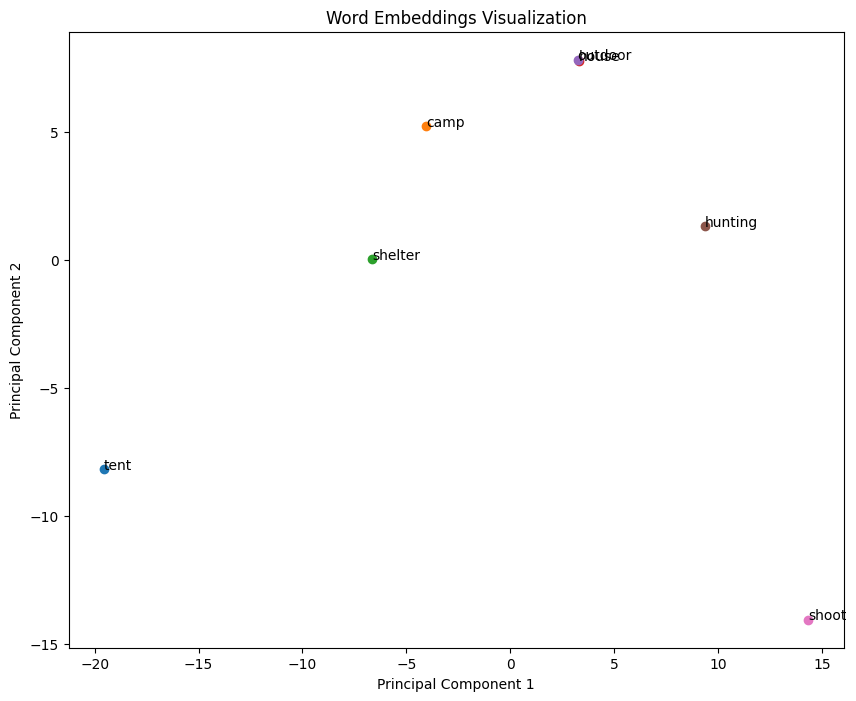

In [ ]:
# prompt: Visualize embeddings for 'tent', 'camp', 'shelter', 'house', 'outdoor', 'hunting', 'shoot'

import matplotlib.pyplot as plt
import numpy as np

words = ['tent', 'camp', 'shelter', 'house', 'outdoor', 'hunting', 'shoot']
embeddings = [model.wv[word] for word in words if word in model.wv]

# Reduce dimensionality for visualization (e.g., using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create the plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    if word in model.wv:
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Word Embeddings Visualization")
plt.show()